In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 
from sklearn.model_selection import train_test_split
import spacy
from spacy import displacy
from gensim.similarities.annoy import AnnoyIndexer
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
import nltk
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('../input/iba-ml1-final-project/train.csv')
df.head()

,Id,Age,Review_Title,Review,Pos_Feedback_Cnt,Division,Department,Product_Category,Rating,Recommended
0,17274,34,Cute fall/holiday top,Love this top! the quality is magnificent and ...,1,General,Tops,Blouses,5,1
1,5921,35,NaN,NaN,0,General,Tops,Blouses,5,1
2,16479,40,Disappointed,"Sleeves were tight, was difficult to put on ?....",15,General,Tops,Blouses,2,0
3,1925,28,Gorgeous detailing,I never write reviews but this clothe is so fa...,3,General Petite,Clothes,Clothes,5,1
4,5691,39,Cute and comfortable tee!,Love this tshirt! casual but can be clotheed u...,0,General,Tops,Knits,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                14091 non-null  int64 
 1   Age               14091 non-null  int64 
 2   Review_Title      11732 non-null  object
 3   Review            13588 non-null  object
 4   Pos_Feedback_Cnt  14091 non-null  int64 
 5   Division          14080 non-null  object
 6   Department        14080 non-null  object
 7   Product_Category  14080 non-null  object
 8   Rating            14091 non-null  int64 
 9   Recommended       14091 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Id,Age,Pos_Feedback_Cnt,Rating,Recommended
count,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000
mean,11713.941736,43.093677,2.465474,4.197786,0.822511
std,6768.152493,12.176401,5.519936,1.109792,0.382096
min,0.000000,18.000000,0.000000,1.000000,0.000000
25%,5860.000000,34.000000,0.000000,4.000000,1.000000
50%,11693.000000,41.000000,1.000000,5.000000,1.000000
75%,17555.500000,51.000000,3.000000,5.000000,1.000000
max,23485.000000,94.000000,122.000000,5.000000,1.000000


In [7]:
df.isna().sum()

Id                     0
Age                    0
Review_Title        2359
Review               503
Pos_Feedback_Cnt       0
Division              11
Department            11
Product_Category      11
Rating                 0
Recommended            0
dtype: int64

A lot of review titles are missing

And 501 reviews are  missing 

I will try to visualize how people who did not wrote review are rating and recommending

### This is how people who writes review ratings look like

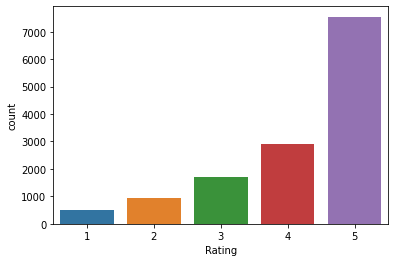

Average rating of people who wrote Review was 4.185089785104504


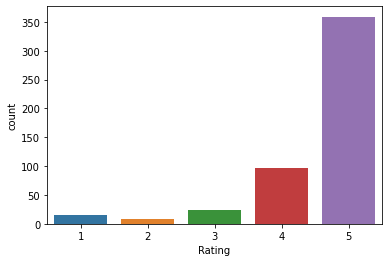

Average rating of people who did not wrote Review was 4.540755467196819


In [8]:
sns.countplot(x=df[~df['Review'].isna()]['Rating'])
plt.show()
print('Average rating of people who wrote Review was', np.mean(df[~df['Review'].isna()]['Rating']))
sns.countplot(x=df[df['Review'].isna()]['Rating'])
plt.show()
print('Average rating of people who did not wrote Review was', np.mean(df[df['Review'].isna()]['Rating']))

### The conclusion is people who did not wrote reviews were more likely to give higher rating

### There are a lot more missing columns in Review title column

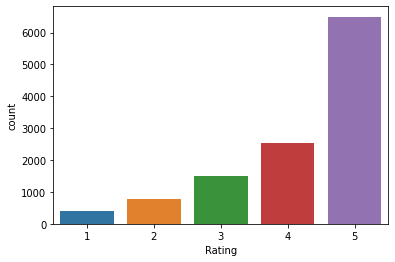

Average rating of people who wrote Review_Title was 4.185089785104504


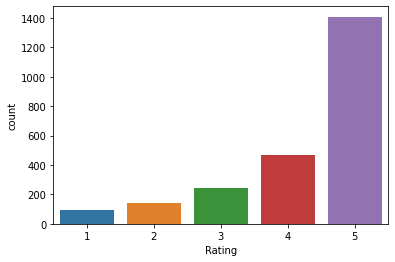

Average rating of people who did not wrote Review_Title was 4.540755467196819


In [9]:
sns.countplot(x=df[~df['Review_Title'].isna()]['Rating'])
plt.show()
print('Average rating of people who wrote Review_Title was', np.mean(df[~df['Review'].isna()]['Rating']))

sns.countplot(x=df[df['Review_Title'].isna()]['Rating'])
plt.show()
print('Average rating of people who did not wrote Review_Title was', np.mean(df[df['Review'].isna()]['Rating']))

## Let's see how likely people who did not write review or review title are recommending

Average Recommended score of people who wrote Review was 0.8186635266411539


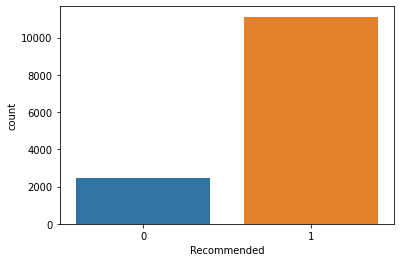

Average Recommended score of people who wrote Review was 0.9264413518886679


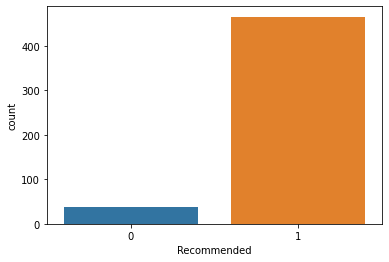

In [10]:
sns.countplot(x=df[~df['Review'].isna()]['Recommended'])
print('Average Recommended score of people who wrote Review was', np.mean(df[~df['Review'].isna()]['Recommended']))
plt.show()
sns.countplot(x=df[df['Review'].isna()]['Recommended'])
print('Average Recommended score of people who wrote Review was', np.mean(df[df['Review'].isna()]['Recommended']))
plt.show()

Average Recommended score of people who wrote Review_Title was 0.819127173542448


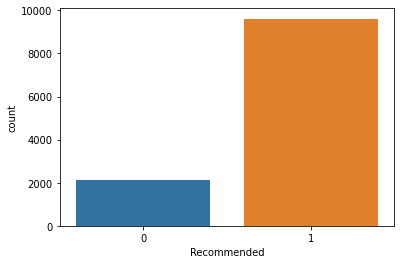

Average Recommended score of people who did not wrote Review_Title was 0.8393387028401865


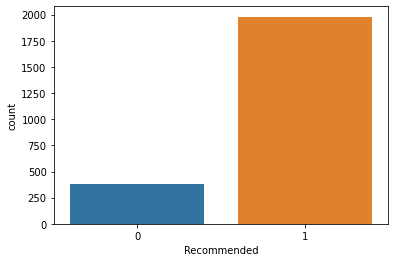

In [11]:
sns.countplot(x=df[~df['Review_Title'].isna()]['Recommended'])
print('Average Recommended score of people who wrote Review_Title was', 
      np.mean(df[~df['Review_Title'].isna()]['Recommended']))
plt.show()

sns.countplot(x=df[df['Review_Title'].isna()]['Recommended'])
print('Average Recommended score of people who did not wrote Review_Title was', 
      np.mean(df[df['Review_Title'].isna()]['Recommended']))
plt.show()


<AxesSubplot:xlabel='Rating', ylabel='Age'>

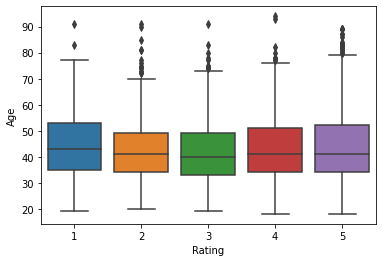

In [12]:
sns.boxplot(x="Rating", y="Age", data=df)

## There is no notable pattern between the ages and the rating

## Now lets check if data is imbalanced

<AxesSubplot:xlabel='Recommended', ylabel='count'>

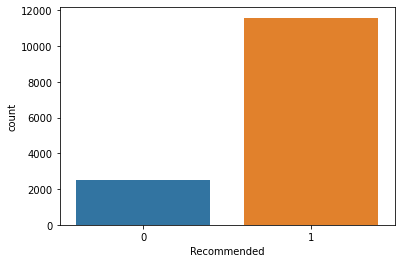

In [15]:
sns.countplot(x='Recommended', data=df)

### The dataset is imbalanced we will undersample it in the Model notebook before running the model

<AxesSubplot:xlabel='Recommended', ylabel='Age'>

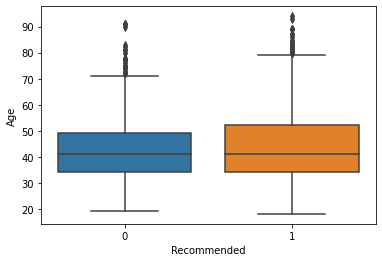

In [16]:
sns.boxplot(x="Recommended", y="Age", data=df)

## There is no notable pattern between the ages and the rating or reccomendation

In [17]:
df['Division'].value_counts()

General           8352
General Petite    4824
Initmates          904
Name: Division, dtype: int64

We have three types of division

In [18]:
df['Division'].isna().sum()

11

<AxesSubplot:xlabel='Recommended', ylabel='count'>

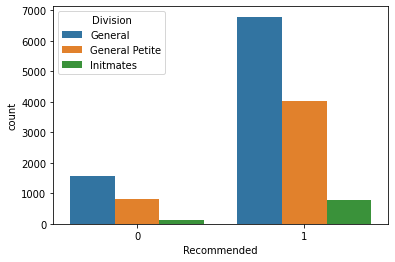

In [19]:
sns.countplot(x='Recommended', data=df, hue='Division')

In [20]:
df['Department'].value_counts()

Tops        6320
Clothes     3761
Bottoms     2298
Intimate    1039
Coats        589
Trend         73
Name: Department, dtype: int64

<AxesSubplot:xlabel='Recommended', ylabel='count'>

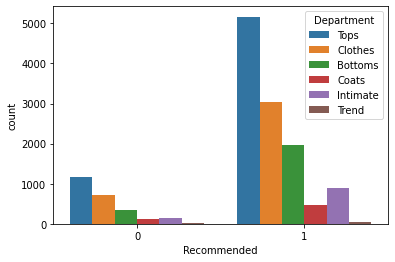

In [21]:
sns.countplot(x='Recommended', data=df, hue='Department')

### There is not much that we can figure out from this graph but it seems 'Intimate' department is fluctuating 
### Perhaps this can be useful for our algorithm 

In [22]:
df['Product_Category'].value_counts()

Clothes           3761
Knits             2949
Blouses           1822
Sweaters           867
Trousers           829
Jeans              702
Fine gauge         682
Skirts             579
Lounge             419
Coats              404
Swim               212
Shorts             186
Outerwear          185
Sleep              136
Legwear            100
Intimates           90
Layering            81
Trend               73
Casual bottoms       2
Chemises             1
Name: Product_Category, dtype: int64

## Product_Category, Department and Division has missing values and we will fill them with most frequent

In [23]:
df['Product_Category'] = df['Product_Category'].fillna(value=df['Product_Category'].mode()[0])
df['Department'] = df['Department'].fillna(value=df['Department'].mode()[0])
df['Division'] = df['Division'].fillna(value=df['Division'].mode()[0])

In [24]:
df['Review'] = df['Review'].fillna(value='nan')
df['Review_Title'] = df['Review_Title'].fillna(value='nan')

In [25]:
df.isna().sum()

Id                  0
Age                 0
Review_Title        0
Review              0
Pos_Feedback_Cnt    0
Division            0
Department          0
Product_Category    0
Rating              0
Recommended         0
dtype: int64

## We got rid off missing columns, but we will try different techniques with different models in the future

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                14091 non-null  int64 
 1   Age               14091 non-null  int64 
 2   Review_Title      14091 non-null  object
 3   Review            14091 non-null  object
 4   Pos_Feedback_Cnt  14091 non-null  int64 
 5   Division          14091 non-null  object
 6   Department        14091 non-null  object
 7   Product_Category  14091 non-null  object
 8   Rating            14091 non-null  int64 
 9   Recommended       14091 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.1+ MB


### I will convert Rating and Recommended columns string to because our problem is classification

In [27]:
df['Rating'] = df['Rating'].apply(lambda s: str(s))
df['Recommended'] = df['Recommended'].apply(lambda s: str(s))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14091 entries, 0 to 14090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                14091 non-null  int64 
 1   Age               14091 non-null  int64 
 2   Review_Title      14091 non-null  object
 3   Review            14091 non-null  object
 4   Pos_Feedback_Cnt  14091 non-null  int64 
 5   Division          14091 non-null  object
 6   Department        14091 non-null  object
 7   Product_Category  14091 non-null  object
 8   Rating            14091 non-null  object
 9   Recommended       14091 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


# Now we will analyze Review and Review_Title

### Wordcloud of reviews

In [29]:
wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['Review'].astype(str)))

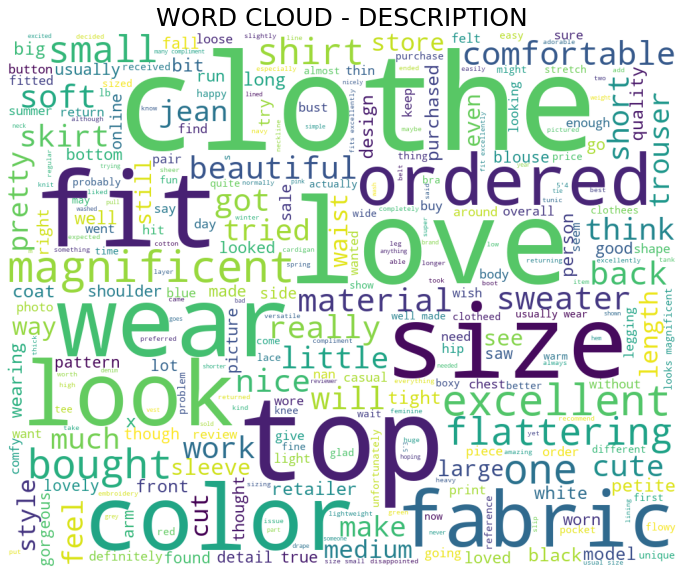

In [30]:
print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

### Wordcloud of Review_Title

In [31]:
wordcloud_title = WordCloud(
    background_color='white',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['Review_Title'].astype(str)))

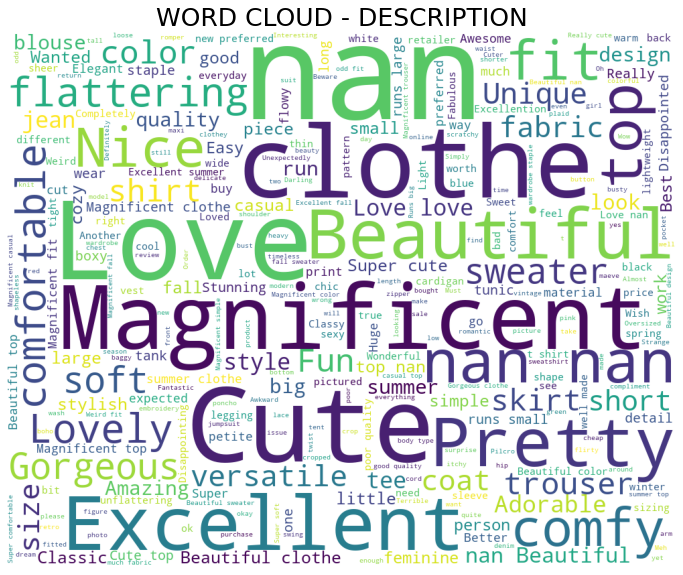

In [32]:
print(wordcloud_title)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud_title)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

### Count Vecotrizer

In [33]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [34]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 2 reviews in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["Review"][0:3])

print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 61)
[[1 3 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 3 2 1 1 2 1 1 4 0 1 1 0 1 1
  1 1 0 0 1 1 1 0 0 1 1 0 3 1 0 0 1 1 1 0 0 1 0 3 0]]


The result above tells us there are 64 different tokens in first 3 reviews

In [35]:
train_vectors = count_vectorizer.fit_transform(train_df["Review"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["Review"])

In [36]:
clf = linear_model.RidgeClassifier()

In [39]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["Recommended"], cv=3)
print("Accuracy for Recommended variable",np.mean(scores))

Accuracy for Recommended variable 0.8529855381066453


In [40]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["Rating"], cv=3)
print("Accuracy for Recommended variable",np.mean(scores))

Accuracy for Recommended variable 0.5816697719811906


### The results are not great. For more accurate models please model notebook 

# Thanks